In [2]:
import pandas as pd

In [3]:
file_path = "space_mission_data (2).csv"
df = pd.read_csv(r"C:\Users\ommur\OneDrive\Desktop\intership\spacemission\space_mission_data (2).csv")


In [4]:
display(df.head())

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


In [6]:
#Drop unnecessary columns
# Remove Price column (too many missing values)
if "Price" in df.columns:
    df.drop(columns=["Price"], inplace=True)
if "Unnamed: 0.1" in df.columns:
    df.drop(columns=["Unnamed: 0.1"], inplace=True)  

In [7]:
display(df.head())

,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success


In [8]:
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)  

In [9]:
display(df.head())

,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success


In [10]:
# Step 5: Date conversion
# -------------------------------
df["Date"] = pd.to_datetime(df["Date"], errors="coerce") 

In [11]:
display(df.head())

,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,Success


In [12]:
# Split location into "Location" and "Country" in one go
df[["Location", "Country"]] = df["Location"].str.rsplit(",", n=1, expand=True)
df["Location"] = df["Location"].str.strip()
df["Country"] = df["Country"].str.strip()
display(df.head())

,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,Success,USA


In [13]:
df = df[["Organisation", "Location", "Country", "Date", "Detail", "Rocket_Status", "Mission_Status"]]
display(df.head())

,Organisation,Location,Country,Date,Detail,Rocket_Status,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida",USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,SpaceX,"Pad A, Boca Chica, Texas",USA,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome",Kazakhstan,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida",USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,Success


In [14]:
# Sort by Date (latest → oldest)
df = df.sort_values(by="Date", ascending=False).reset_index(drop=True)
display(df.head())

,Organisation,Location,Country,Date,Detail,Rocket_Status,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida",USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,SpaceX,"Pad A, Boca Chica, Texas",USA,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome",Kazakhstan,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida",USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,Success


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Country         4324 non-null   object             
 3   Date            4198 non-null   datetime64[ns, UTC]
 4   Detail          4324 non-null   object             
 5   Rocket_Status   4324 non-null   object             
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 236.6+ KB
None


In [16]:
print(df.describe())

       Organisation                        Location Country  \
count          4324                            4324    4324   
unique           56                             137      22   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome  Russia   
freq           1777                             235    1395   
mean            NaN                             NaN     NaN   
min             NaN                             NaN     NaN   
25%             NaN                             NaN     NaN   
50%             NaN                             NaN     NaN   
75%             NaN                             NaN     NaN   
max             NaN                             NaN     NaN   

                                       Date  \
count                                  4198   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean    1987-12-23 12:59:23.639828544+00:00   
min               1957-1

In [17]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

     Organisation                                           Location Country  \
772          CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   China   
773          CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   China   
4208          ISA       Imam Khomeini Spaceport, Semnan Space Center    Iran   
4211          ISA       Imam Khomeini Spaceport, Semnan Space Center    Iran   
4212          ISA       Imam Khomeini Spaceport, Semnan Space Center    Iran   
4247    RVSN USSR                            Site 86/1, Kapustin Yar  Russia   
4248    RVSN USSR                            Site 86/1, Kapustin Yar  Russia   
4249    RVSN USSR                            Site 86/1, Kapustin Yar  Russia   
4252    RVSN USSR                            Site 86/1, Kapustin Yar  Russia   
4254    RVSN USSR                            Site 86/1, Kapustin Yar  Russia   
4255    RVSN USSR                            Site 86/1, Kapustin Yar  Russia   
4257    RVSN USSR                       

In [18]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 12


In [19]:
df = df.drop_duplicates().reset_index(drop=True)


In [20]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [21]:
missing_dates = df[df["Date"].isnull()]
print(missing_dates.head())

     Organisation                                      Location Country Date  \
4197          ISA  Imam Khomeini Spaceport, Semnan Space Center    Iran  NaT   
4198          ISA  Imam Khomeini Spaceport, Semnan Space Center    Iran  NaT   
4199  Blue Origin    Blue Origin Launch Site, West Texas, Texas     USA  NaT   
4200          ISA  Imam Khomeini Spaceport, Semnan Space Center    Iran  NaT   
4201  Blue Origin    Blue Origin Launch Site, West Texas, Texas     USA  NaT   

                     Detail Rocket_Status     Mission_Status  
4197    Safir-1B+ | Nahid-1  StatusActive  Prelaunch Failure  
4198     Safir-1B+ | Dousti  StatusActive            Failure  
4199     New Shepard | NS-7  StatusActive            Success  
4200  Simorgh | Test Flight  StatusActive            Failure  
4201     New Shepard | NS-4  StatusActive            Success  


In [22]:
print("Total missing dates:", df["Date"].isnull().sum())

Total missing dates: 115


In [23]:
median_date = df["Date"].median()
df["Date"] = df["Date"].fillna(median_date)

In [24]:
print("Total missing dates:", df["Date"].isnull().sum())

Total missing dates: 0


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4312 non-null   object             
 1   Location        4312 non-null   object             
 2   Country         4312 non-null   object             
 3   Date            4312 non-null   datetime64[ns, UTC]
 4   Detail          4312 non-null   object             
 5   Rocket_Status   4312 non-null   object             
 6   Mission_Status  4312 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 235.9+ KB
None


In [26]:
# Import visualization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np
# Ensure date/year column exists 
df['year'] = df['Date'].dt.year 

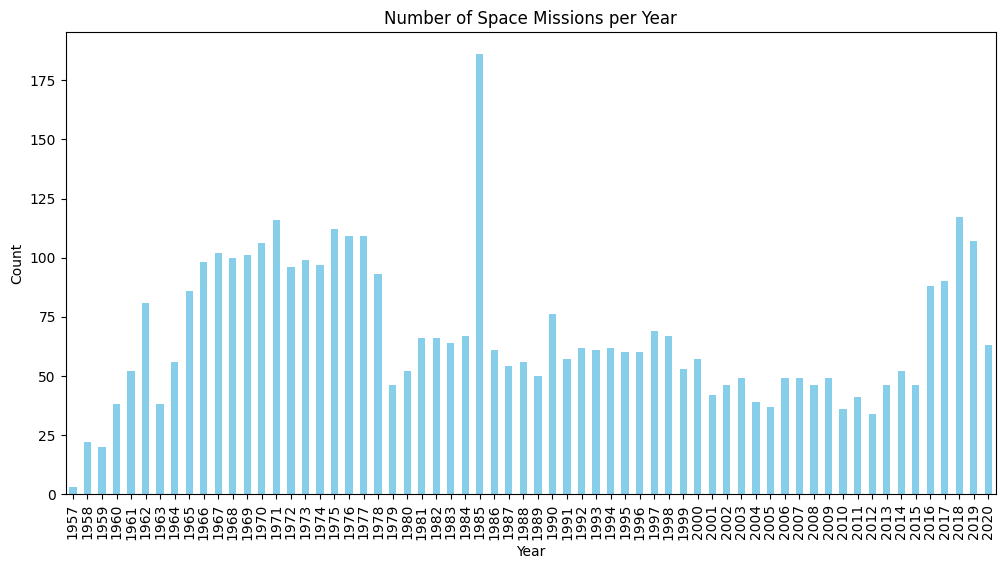

Insight: Reveals growth cycles & disruptions; peaks = space race/ private sector 
surge, declines = budget or geopolitical impact.


In [29]:
# ---------------------------
# 1. Distribution of missions over time
# Graph Type: Bar Plot
# ---------------------------
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and it has a 'Date' column
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['year'] = df['Date'].dt.year

plt.figure(figsize=(12, 6))
df['year'].value_counts().sort_index().plot(kind="bar", color='skyblue')
plt.title("Number of Space Missions per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

print("""Insight: Reveals growth cycles & disruptions; peaks = space race/ private sector 
surge, declines = budget or geopolitical impact.""")


--- 2. Top 10 Organizations by Missions ---


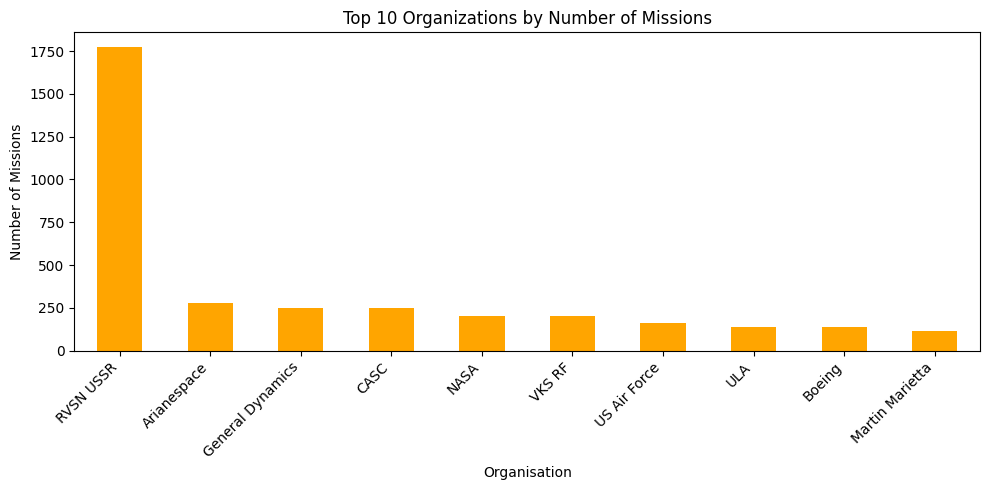


 💡 Insight: Highlights market leaders & challengers; useful for competitive
 benchmarking and identifying dominant players.


In [31]:
# 2. Top 10 Organizations by Missions
print("\n--- 2. Top 10 Organizations by Missions ---")
plt.figure(figsize=(10, 5))
df['Organisation'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Organizations by Number of Missions")
plt.ylabel("Number of Missions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("""
 💡 Insight: Highlights market leaders & challengers; useful for competitive
 benchmarking and identifying dominant players.""")



--- 3. Mission Success vs. Failure ---


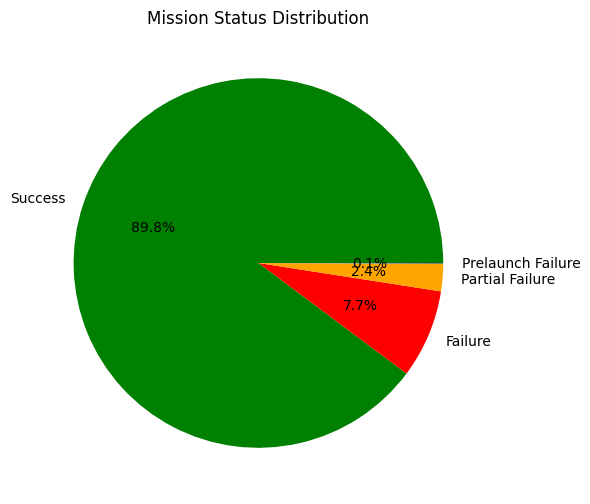


 💡 Insight: Shows risk vs reliability trends; high failure rates indicate testing or
 emerging players.


In [32]:
# 3. Mission success vs failure
print("\n--- 3. Mission Success vs. Failure ---")
plt.figure(figsize=(6, 6))
df['Mission_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                         colors=['green', 'red', 'orange', 'gray'])
plt.title("Mission Status Distribution")
plt.ylabel("")
plt.show()
print("""
 💡 Insight: Shows risk vs reliability trends; high failure rates indicate testing or
 emerging players.""")


--- 4. Outlier Detection in Missions per Year ---


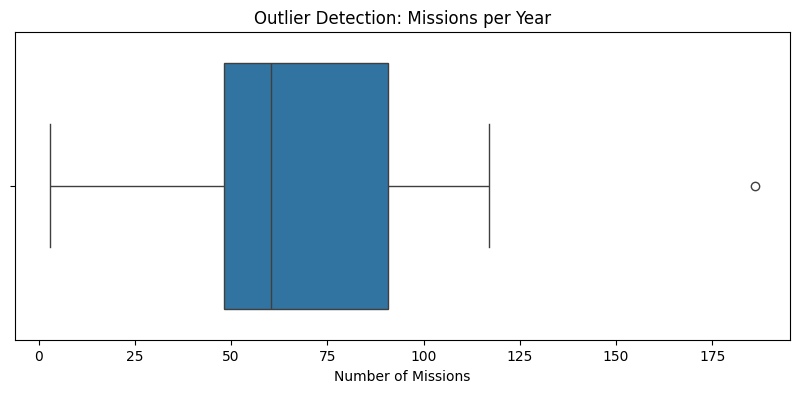


 💡 Insight: Detects unusual years (outliers) highlighting external shocks; also uncovers
 data quality issues.


In [33]:
# 4. Outlier detection (missions per year)
print("\n--- 4. Outlier Detection in Missions per Year ---")
missions_per_year_series = df.groupby('year').size()
plt.figure(figsize=(10, 4))
sns.boxplot(x=missions_per_year_series)
plt.title("Outlier Detection: Missions per Year")
plt.xlabel("Number of Missions")
plt.show()
print("""
 💡 Insight: Detects unusual years (outliers) highlighting external shocks; also uncovers
 data quality issues.""")


--- 5. Normality Check of Missions Per Year ---


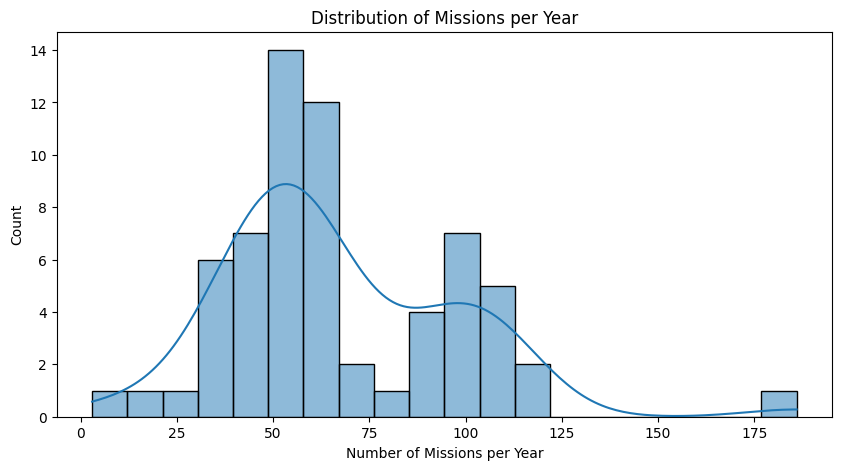


 💡 Insight: Checks if growth is linear; skewed distribution indicates sudden market
 surges or new entrants.


In [34]:
# 5. Normality Check of Missions Per Year
print("\n--- 5. Normality Check of Missions Per Year ---")
plt.figure(figsize=(10, 5))
sns.histplot(missions_per_year_series, kde=True, bins=20)
plt.title("Distribution of Missions per Year")
plt.xlabel("Number of Missions per Year")
plt.show()
print("""
 💡 Insight: Checks if growth is linear; skewed distribution indicates sudden market
 surges or new entrants.""")

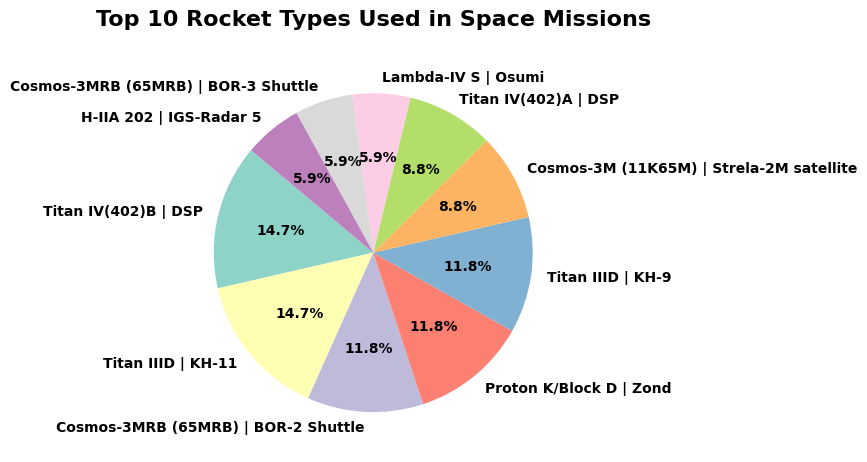

💡 Insight: Shows share of missions by rocket families, highlighting which designs dominate overall activity.


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 rockets from Detail column
top_rockets = (
    df['Detail']
    .value_counts()
    .head(10)
    .reset_index()
)

# Rename columns
top_rockets.columns = ["Rocket_Type", "Count"]

# Data
labels = top_rockets["Rocket_Type"]
sizes = top_rockets["Count"]

# Professional color palette
colors = sns.color_palette("Set3", n_colors=len(top_rockets))

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10, 'weight': 'bold', 'color': 'black'}
)

# Title
plt.title("Top 10 Rocket Types Used in Space Missions", fontsize=16, weight="bold", pad=20)

plt.tight_layout()
plt.show()

print("💡 Insight: Shows share of missions by rocket families, highlighting which designs dominate overall activity.")



--- 7. Success Rate by Organization ---


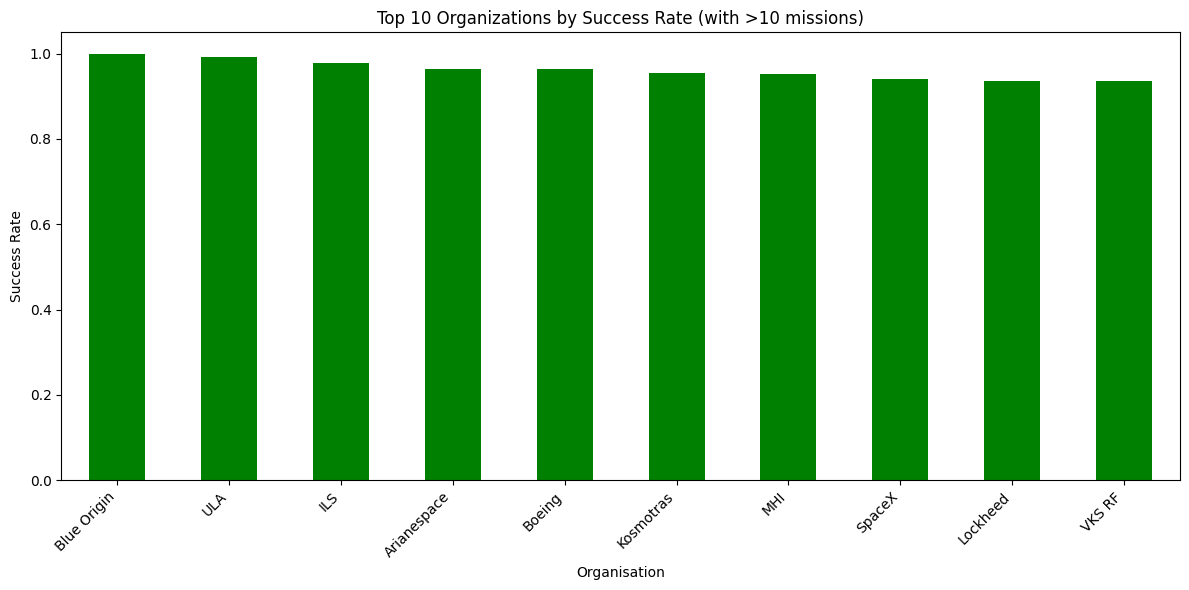


 💡 Insight: Highlights reliable organizations vs high-risk players; useful for partnership
 decisions.


In [38]:
print("\n--- 7. Success Rate by Organization ---")
# Filter for organizations with a reasonable number of missions (e.g., > 10) for a meaningful rate
org_counts = df['Organisation'].value_counts()
orgs_with_10_plus_missions = org_counts[org_counts > 10].index
df_filtered = df[df['Organisation'].isin(orgs_with_10_plus_missions)]

org_success = df_filtered.groupby('Organisation')['Mission_Status'].apply(lambda x: (x == 'Success').mean()).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
org_success.head(10).plot(kind='bar', color='green')
plt.title("Top 10 Organizations by Success Rate (with >10 missions)")
plt.ylabel("Success Rate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("""
 💡 Insight: Highlights reliable organizations vs high-risk players; useful for partnership
 decisions.""")

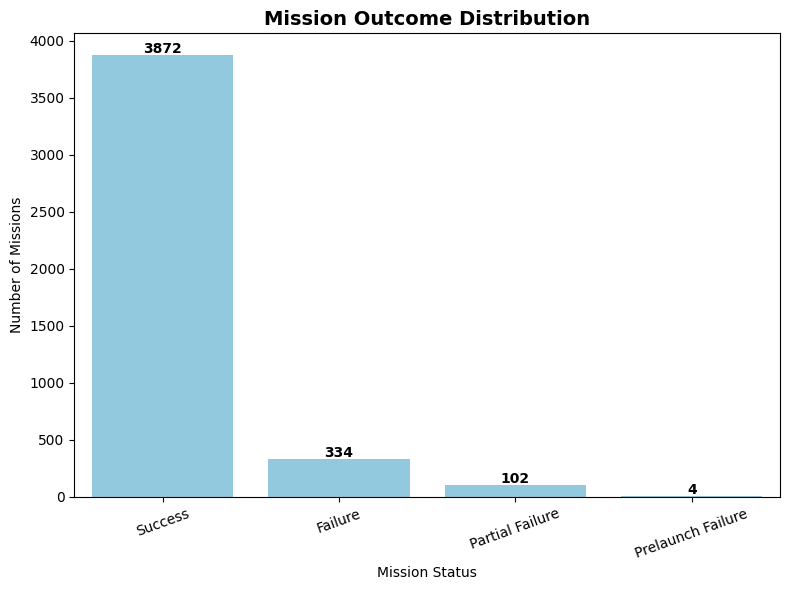

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert value_counts to DataFrame
counts_df = df['Mission_Status'].value_counts().reset_index()
counts_df.columns = ['Mission_Status', 'Count']

plt.figure(figsize=(8,6))
sns.barplot(data=counts_df, x='Mission_Status', y='Count', color="skyblue")  # use color instead of palette

# Add value labels on top of bars
for i, v in enumerate(counts_df['Count']):
    plt.text(i, v + 20, str(v), ha='center', fontsize=10, weight='bold')

plt.title("Mission Outcome Distribution", fontsize=14, weight='bold')
plt.xlabel("Mission Status")
plt.ylabel("Number of Missions")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


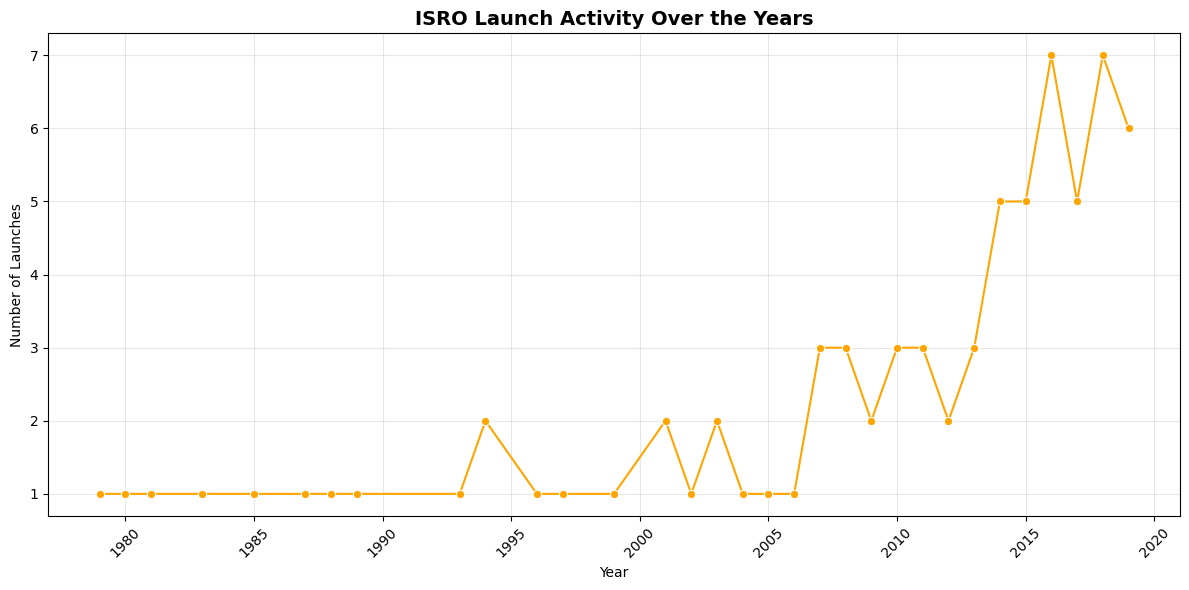

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure a 'year' column exists
df['year'] = df['Date'].dt.year  # if not already created

# Filter only ISRO launches
isro_df = df[df['Organisation'] == 'ISRO']

# Count launches per year
launches_per_year = isro_df.groupby('year').size().reset_index(name='Launches')

# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(data=launches_per_year, x='year', y='Launches', marker='o', color='orange')
plt.title("ISRO Launch Activity Over the Years", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [66]:
print(df.columns.tolist())

['Organisation', 'Location', 'Country', 'Date', 'Detail', 'Rocket_Status', 'Mission_Status', 'year']


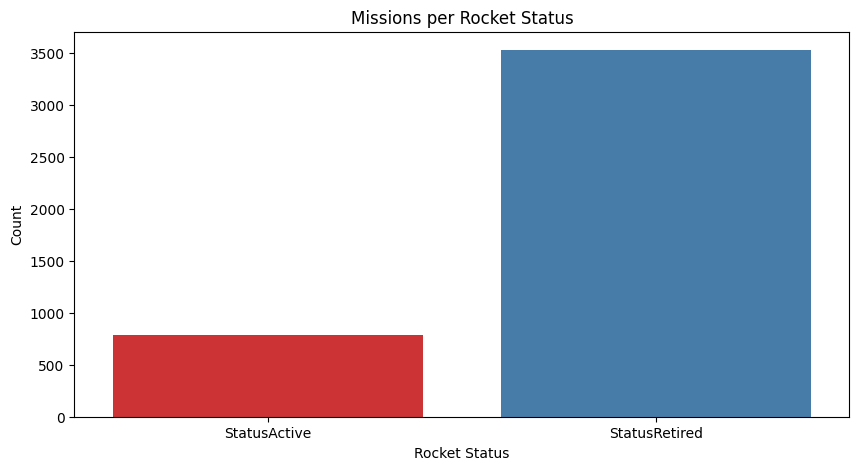

💡 Insight: Shows maturity of rockets (Active/Retired/Failed); can spot inconsistent data entries.


In [68]:
# ---------------------------
# 10. Missions per Rocket Status
# Graph Type: Bar Chart
# ---------------------------
plt.figure(figsize=(10, 5))

# Assign hue explicitly and disable legend since we don’t need duplicate colors
sns.countplot(x='Rocket_Status', hue='Rocket_Status', data=df, palette="Set1", legend=False)

plt.title("Missions per Rocket Status")
plt.xlabel("Rocket Status")
plt.ylabel("Count")
plt.show()

print("💡 Insight: Shows maturity of rockets (Active/Retired/Failed); can spot inconsistent data entries.")


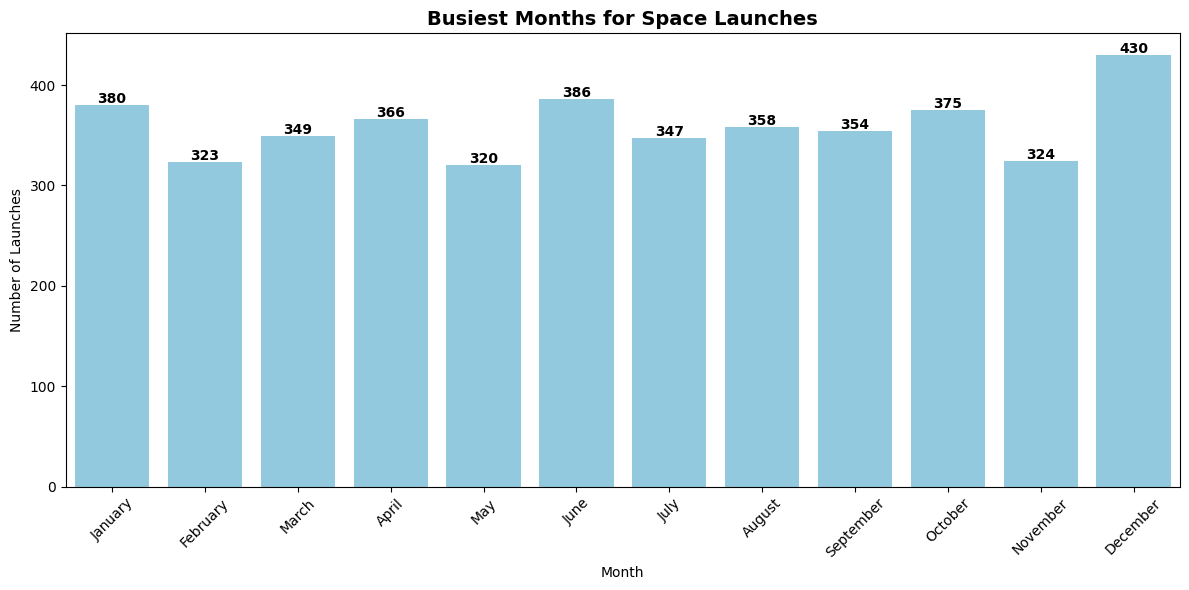

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from Date
df['Month'] = df['Date'].dt.month

# Count launches per month
launches_per_month = df.groupby('Month').size().reset_index(name='Launches')

# Map month numbers to month names
launches_per_month['Month_Name'] = launches_per_month['Month'].apply(lambda x: calendar.month_name[x])

# Sort by month number
launches_per_month = launches_per_month.sort_values('Month')

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(data=launches_per_month, x='Month_Name', y='Launches', color="skyblue")  # use color instead of palette

# Add value labels
for i, v in enumerate(launches_per_month['Launches']):
    plt.text(i, v + 2, str(v), ha='center', fontsize=10, weight='bold')

plt.title("Busiest Months for Space Launches", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Number of Launches")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


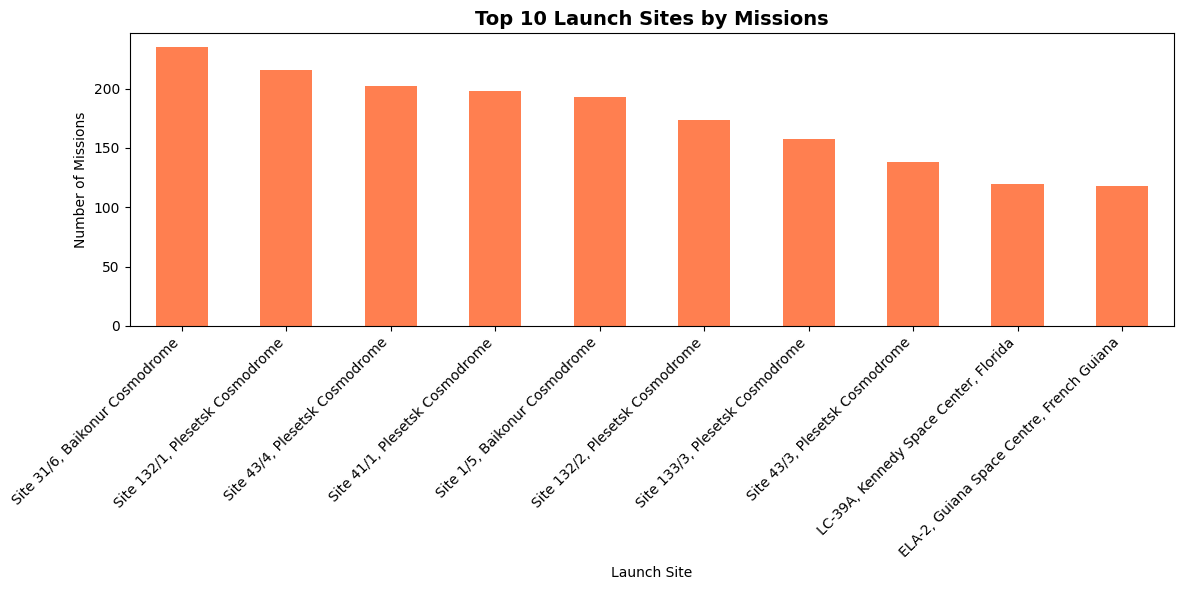

💡 Insight: Highlights key operational hubs; identifies underreported or missing launch site data.


In [71]:
# ---------------------------
# 12. Missions per Launch Site
# Graph Type: Bar Plot
# ---------------------------
plt.figure(figsize=(12, 6))
df['Location'].value_counts().head(10).plot(kind='bar', color='coral')

plt.title("Top 10 Launch Sites by Missions", fontsize=14, weight="bold")
plt.ylabel("Number of Missions")
plt.xlabel("Launch Site")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("💡 Insight: Highlights key operational hubs; identifies underreported or missing launch site data.")


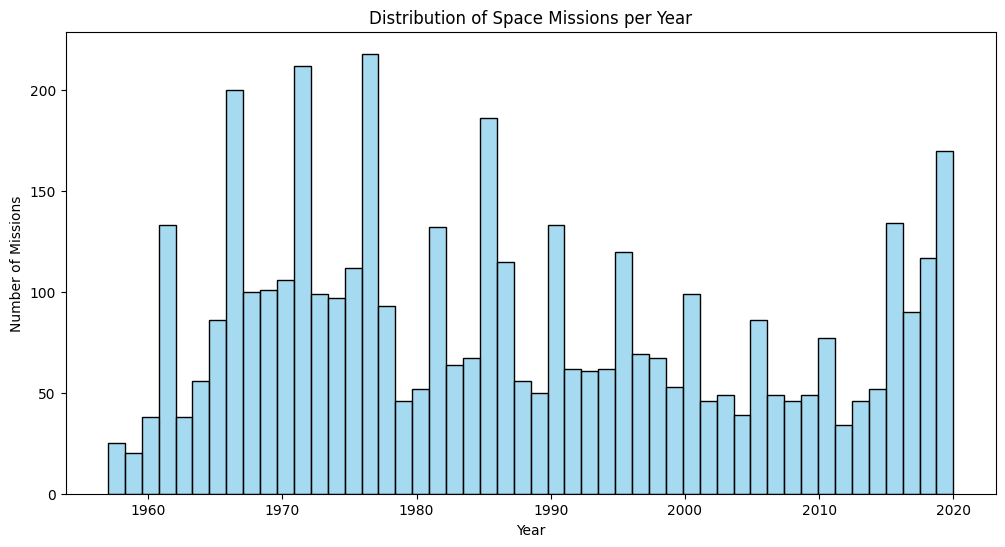

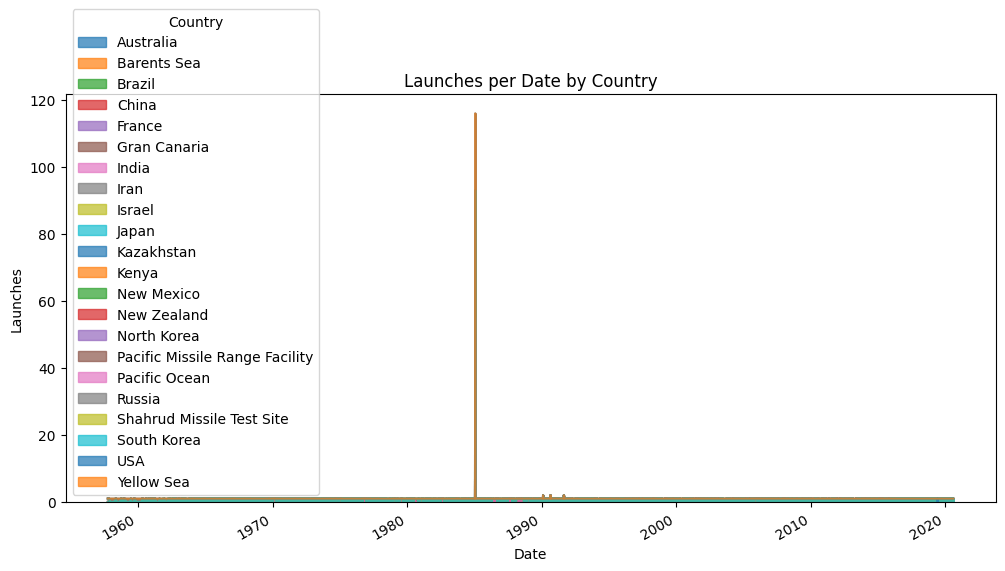

In [87]:
# Histogram of launches per year
plt.figure(figsize=(12,6))
sns.histplot(df["year"].dropna(), bins=50, color="skyblue", kde=False)
plt.title("Distribution of Space Missions per Year")
plt.xlabel("Year")
plt.ylabel("Number of Missions")
plt.show()

# Stacked area per decade by country
country_decade = df.groupby(["Date","Country"]).size().unstack(fill_value=0)
country_decade.plot.area(figsize=(12,6), alpha=0.7)
plt.title("Launches per Date by Country")
plt.xlabel("Date")
plt.ylabel("Launches")
plt.show()


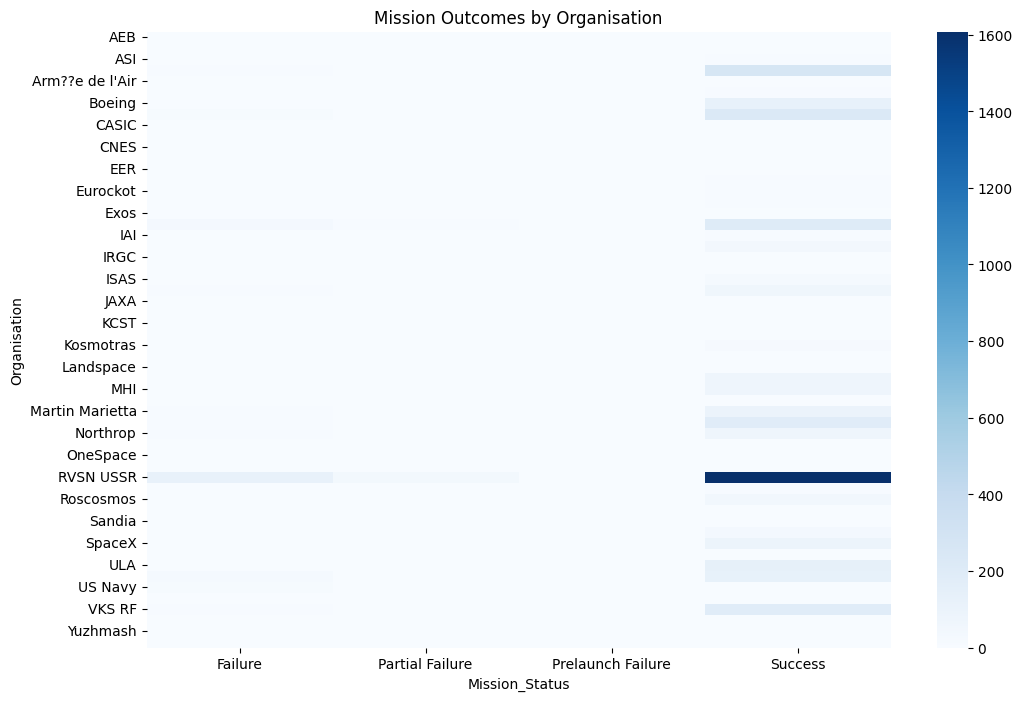

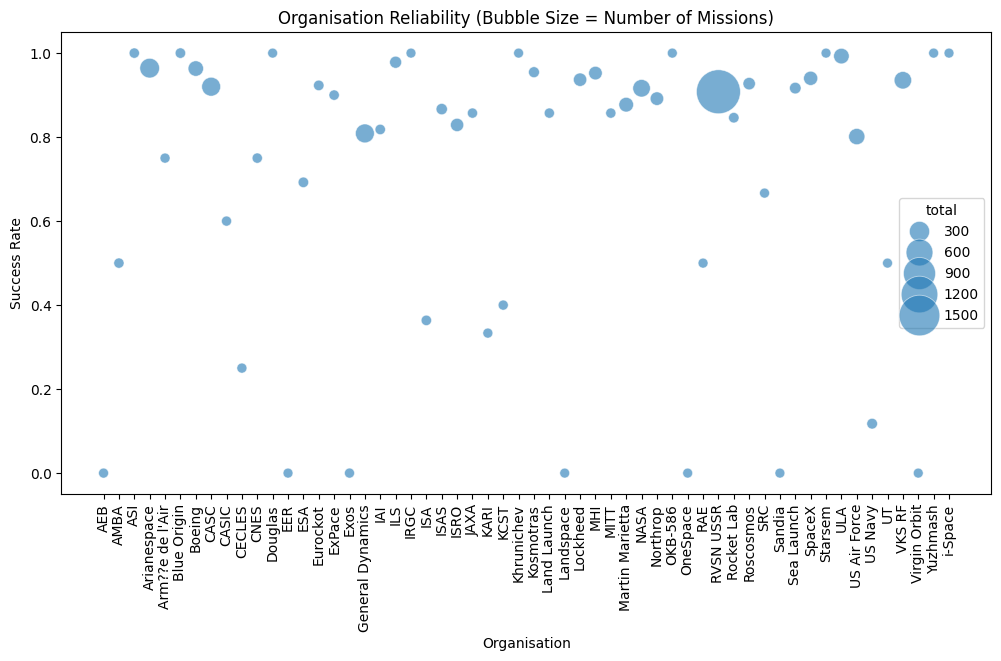

In [73]:
# Heatmap of org vs mission outcomes
org_outcomes = pd.crosstab(df["Organisation"], df["Mission_Status"])
plt.figure(figsize=(12,8))
sns.heatmap(org_outcomes, cmap="Blues", annot=False, cbar=True)
plt.title("Mission Outcomes by Organisation")
plt.show()

# Bubble chart
org_stats = df.groupby("Organisation").agg(
    success_rate=("Mission_Status", lambda x: (x=="Success").mean()),
    total=("Mission_Status","count")
).reset_index()

plt.figure(figsize=(12,6))
sns.scatterplot(data=org_stats, x="Organisation", y="success_rate", size="total", sizes=(50,1000), alpha=0.6)
plt.xticks(rotation=90)
plt.title("Organisation Reliability (Bubble Size = Number of Missions)")
plt.ylabel("Success Rate")
plt.show()


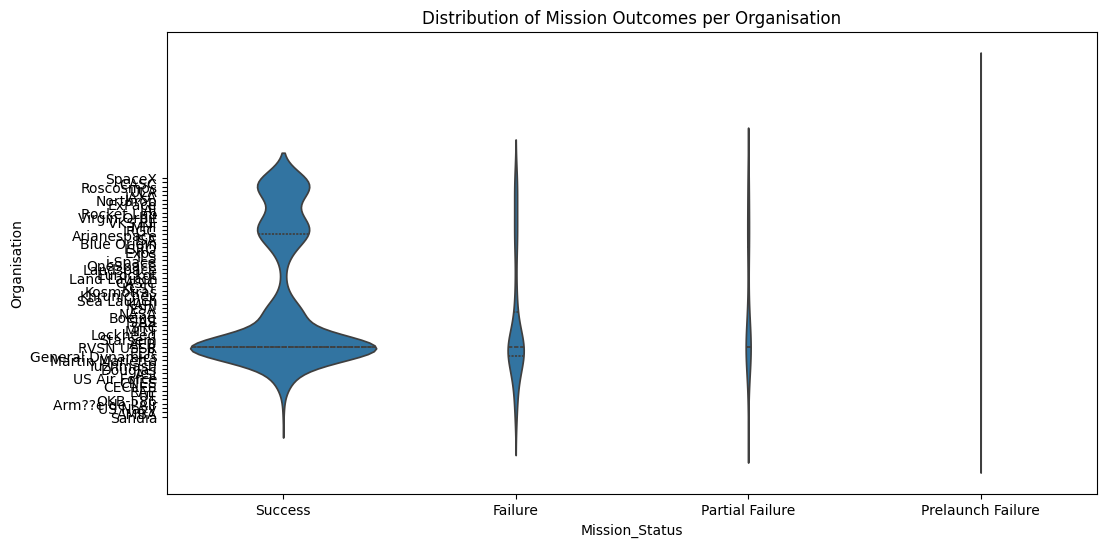

In [85]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=df, 
    x="Mission_Status", 
    y="Organisation", 
    density_norm="count",   # <-- updated parameter
    inner="quart"           # shows quartiles inside the violin
)
plt.title("Distribution of Mission Outcomes per Organisation")
plt.show()


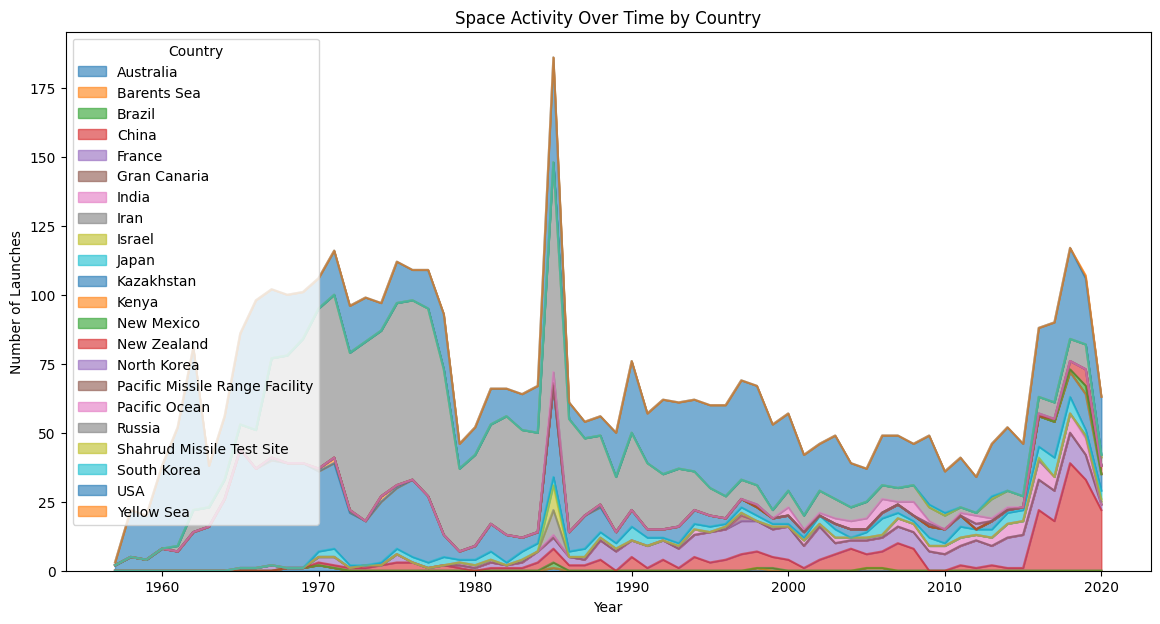

In [84]:
country_year = df.groupby(["year","Country"]).size().unstack(fill_value=0)
country_year.plot.area(figsize=(14,7), alpha=0.6)
plt.title("Space Activity Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.show()


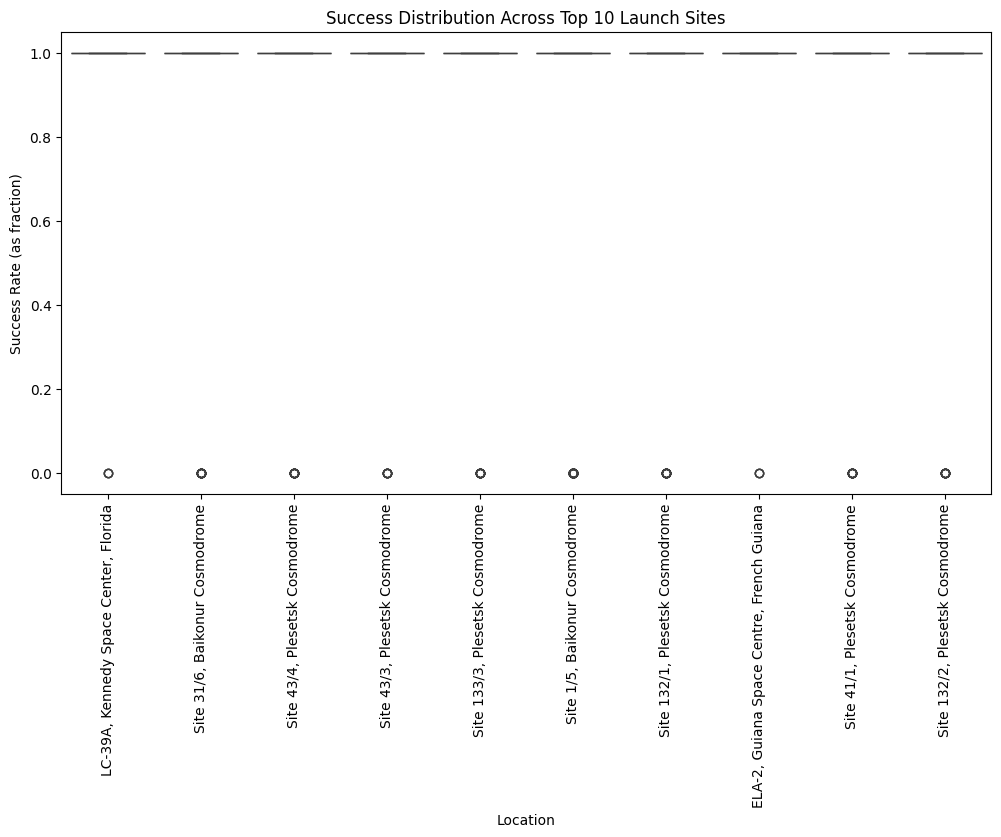

In [76]:
# Boxplot of mission outcomes by top sites
top_sites = df["Location"].value_counts().head(10).index
subset = df[df["Location"].isin(top_sites)]

plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x="Location", y=subset["Mission_Status"]=="Success")
plt.xticks(rotation=90)
plt.title("Success Distribution Across Top 10 Launch Sites")
plt.ylabel("Success Rate (as fraction)")
plt.show()


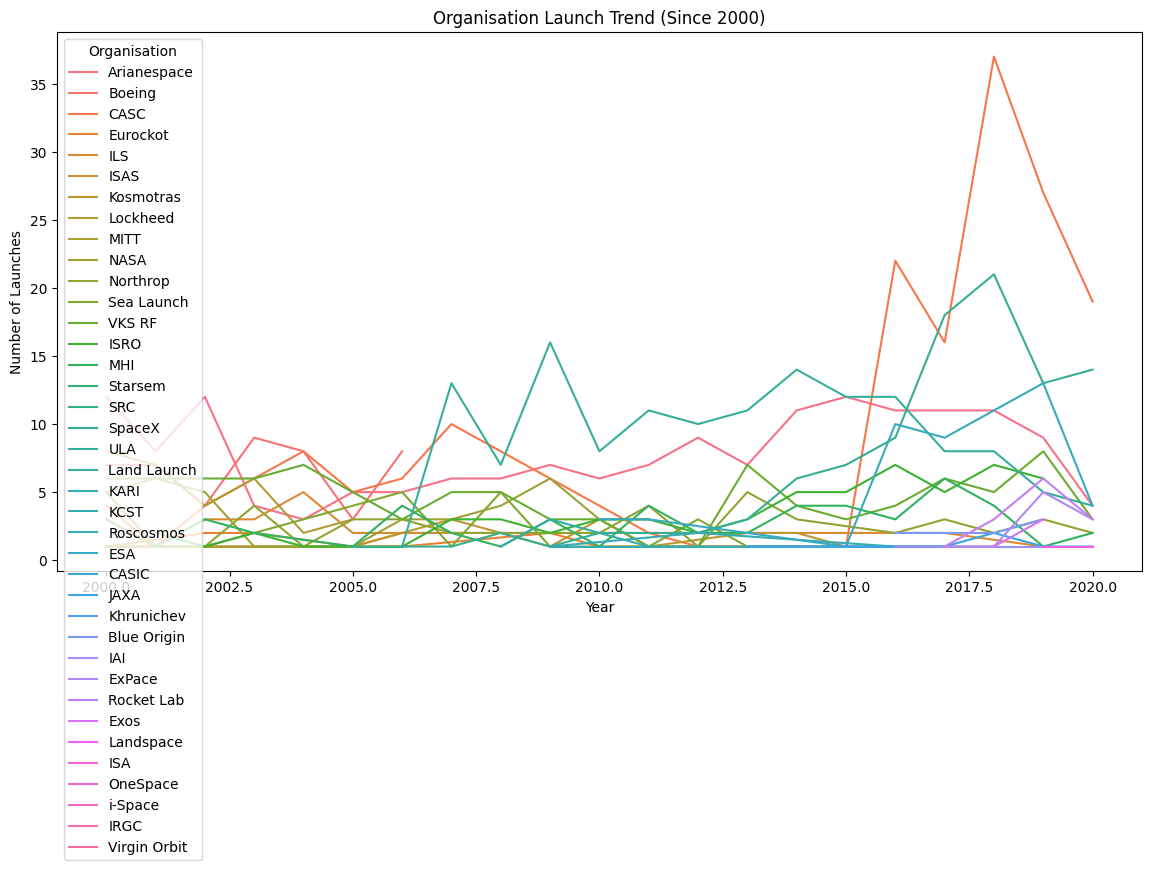

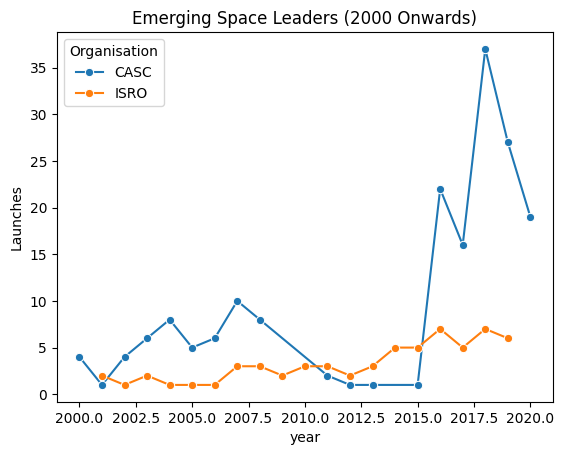

In [83]:
# Filter recent launches
recent = df[df["year"] >= 2000]
org_trend = recent.groupby(["year","Organisation"]).size().reset_index(name="Launches")

# Trend for all organizations
plt.figure(figsize=(14,7))
sns.lineplot(data=org_trend, x="year", y="Launches", hue="Organisation")
plt.title("Organisation Launch Trend (Since 2000)")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.show()

# Trend for selected organizations
sns.lineplot(data=org_trend[org_trend["Organisation"].isin(["Spacex","CASC","ISRO"])],
             x="year", y="Launches", hue="Organisation", marker="o")
plt.title("Emerging Space Leaders (2000 Onwards)")
plt.show()


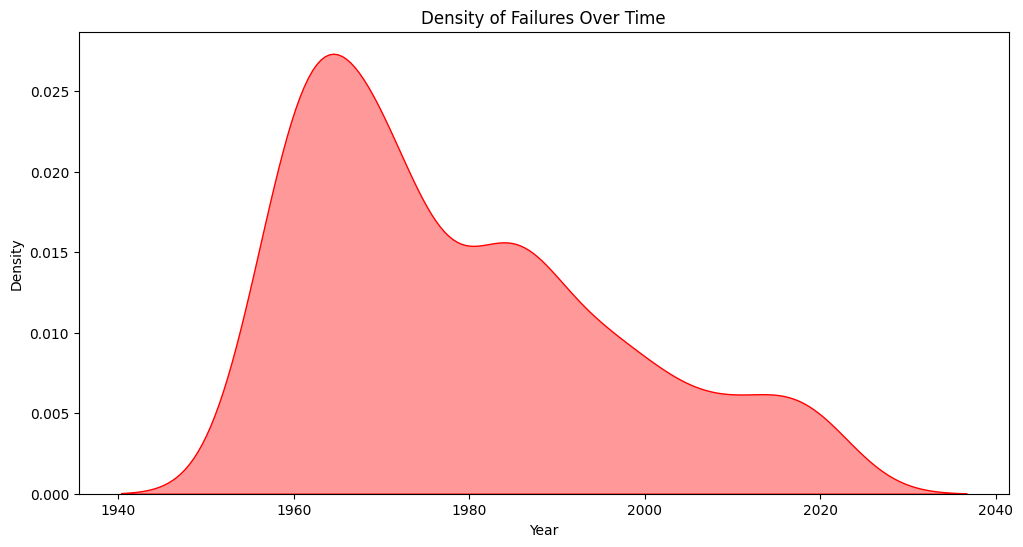

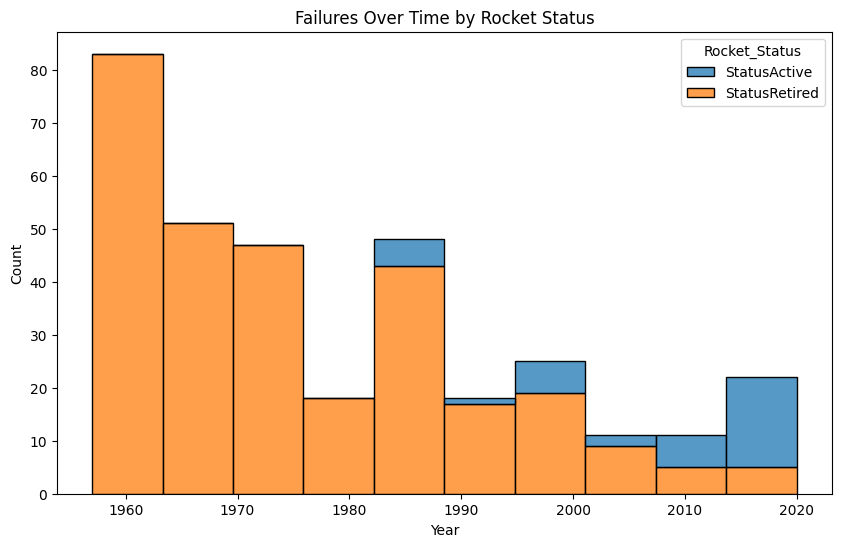

In [81]:
# Filter failures
failures = df[df["Mission_Status"] == "Failure"]

# KDE plot of failures over time
plt.figure(figsize=(12,6))
sns.kdeplot(data=failures, x="year", fill=True, color="red", alpha=0.4)
plt.title("Density of Failures Over Time")
plt.xlabel("Year")
plt.show()

# Histogram of failures by rocket status
plt.figure(figsize=(10,6))
sns.histplot(data=failures, x="year", hue="Rocket_Status", multiple="stack")
plt.title("Failures Over Time by Rocket Status")
plt.xlabel("Year")
plt.show()


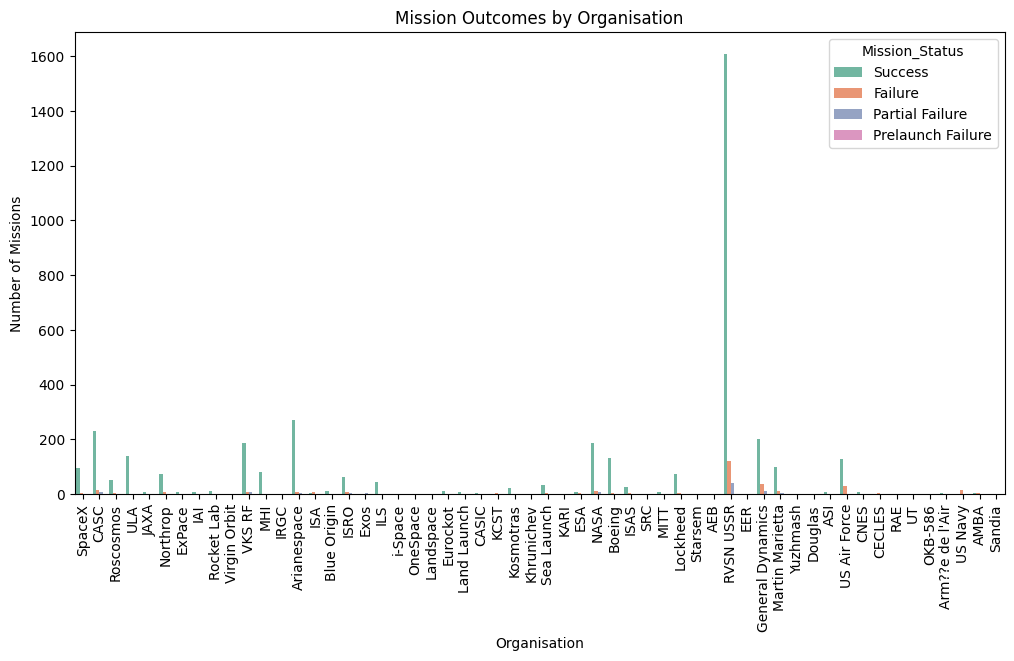

In [80]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Organisation", hue="Mission_Status", palette="Set2")
plt.title("Mission Outcomes by Organisation")
plt.xticks(rotation=90)
plt.ylabel("Number of Missions")
plt.xlabel("Organisation")
plt.show()
